# Event detection with Recurrent Neural Networks - part 3

n this fifth lab of the **ErSE 222 - Machine Learning in Geoscience** course, we will use different types of Recurrent Neural Network Deep to detect events in noisy seismic recordings. 

This is the third part of our lab where we compare various metrics (loss and accuracy) for the different models that we have trained.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import io
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
modelsdir = './'

models = ['lstm_bce', 'lstm_weightedbce', 'lstm_strongweightedbce', 
          'bilstm_strongweightedbce', 'doublelstm_strongweightedbce', 
          'selfattention_strongweightedbce', 'selfattentionlight_strongweightedbce']
colors = ['k', 'r', 'b', 'g', 'm', 'y', '#ffcc00']

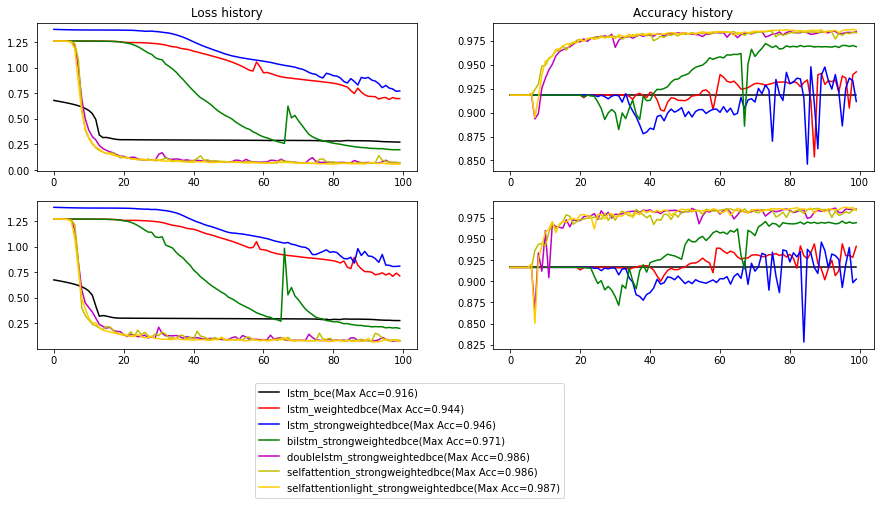

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 6)) 
axs[0][0].set_title('Loss history')
axs[0][1].set_title('Accuracy history')

for col, model in zip(colors, models):
    fhist = np.load(os.path.join(modelsdir, 'models', model + '_trainhistory.npz'))
    train_loss_history = fhist['train_loss_history']
    valid_loss_history = fhist['valid_loss_history']
    train_acc_history = fhist['train_acc_history']
    valid_acc_history = fhist['valid_acc_history']

    axs[0][0].plot(train_loss_history, col, label=model)
    axs[1][0].plot(valid_loss_history, col, label=model)
    
    axs[0][1].plot(train_acc_history, col, label=model)
    axs[1][1].plot(valid_acc_history, col, label=model + '(Max Acc=%.3f)' % valid_acc_history.max())
    
axs[1][1].legend(bbox_to_anchor=(-0.3, -0.7, 0.5, 0.5));